In [2]:
%load_ext autoreload
%autoreload 2
import seml
import seaborn as sns
from poisson_atac.utils import model_type_map
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

Global seed set to 0


In [3]:
from poisson_atac.utils import load_experiment

In [4]:
save_path = '/storage/groups/ml01/workspace/laura.martens/atac_poisson_data/processed/scib/'

In [5]:
dataset_map = {'neurips': 'Neurips\nall batches', 'hematopoiesis': 'Satpathy\net al.', 'satpathy': 'Satpathy\net al.'}

# Load results

In [6]:
def load_seml(seml_database):
    results = seml.get_results(seml_database, to_data_frame=True,  fields=["config", "config_hash", "result", "batch_id"])

    results['config.data.dataset'] = results['config.data.dataset'].map(dataset_map)
    results['config.setup.model_params.use_observed_lib_size'] = results['config.setup.model_params.use_observed_lib_size'].map({True: "True", False: "False", np.nan: ''})
    results['config.model.model_type'] = results['config.model.model_type'] + results['config.setup.model_params.use_observed_lib_size'].astype(str) 
    results["config.model.model_type"] = results["config.model.model_type"].map(model_type_map)

    return results

In [7]:
model_order = [model_type_map['poissonviTrue'], model_type_map['binaryviTrue'], model_type_map["peakvi"]]

In [8]:
seml_database = 'atac_to_atac'

In [9]:
results = load_seml(seml_database)

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

In [10]:
results

,_id,batch_id,config_hash,config.overwrite,config.db_collection,config.data.batch,config.data.dataset,config.model.model_type,config.optimization.regularization.learning_rate,config.optimization.regularization.weight_decay,...,config.seed,result.test_cells,result.test_cells_counts,result.embedding,result.average_precision,result.rmse,result.bce,result.nmi,result.ari,result.model_path
0,2,1,88e513708fc67d6d1551475a95af51de,2,atac_to_atac,"[s1d1, s1d2, s1d3, s2d1, s2d5, s3d10, s3d3, s3...",Neurips\nall batches,Poisson VAE,0.0001,0.001,...,906691060,Model auroc ...,Model poisson_loss 12019...,0 NMI_cluste...,0.269281,0.154149,10813.440339,0.746448,0.671021,/storage/groups/ml01/workspace/laura.martens/a...
1,4,1,5c4f7a50d51ff2949ca583b19418c2a7,4,atac_to_atac,"[s1d1, s1d2, s1d3, s2d1, s2d5, s3d10, s3d3, s3...",Neurips\nall batches,Poisson VAE,0.0001,0.001,...,906691060,Model auroc ...,Model poisson_loss 12017....,0 NMI_cluste...,0.269407,0.154142,10811.580137,0.759786,0.707106,/storage/groups/ml01/workspace/laura.martens/a...
2,6,1,588f6d281aaf2e7986e8fdfb690ee006,6,atac_to_atac,"[s1d1, s1d2, s1d3, s2d1, s2d5, s3d10, s3d3, s3...",Neurips\nall batches,Poisson VAE,0.0001,0.001,...,906691060,Model auroc ...,Model poisson_loss 12017...,0 NMI_cluste...,0.269365,0.154143,10812.183573,0.747384,0.689954,/storage/groups/ml01/workspace/laura.martens/a...
3,8,1,61d5908ec4acefc22c8689f123fd7472,8,atac_to_atac,"[s1d1, s1d2, s1d3, s2d1, s2d5, s3d10, s3d3, s3...",Neurips\nall batches,Poisson VAE,0.0001,0.001,...,906691060,Model auroc ...,Model poisson_loss 12017...,0 NMI_cluste...,0.269371,0.154142,10812.071546,0.752737,0.699916,/storage/groups/ml01/workspace/laura.martens/a...
4,10,1,8b2b121f2f554efb85dc68d4695ac271,10,atac_to_atac,"[s1d1, s1d2, s1d3, s2d1, s2d5, s3d10, s3d3, s3...",Neurips\nall batches,Poisson VAE,0.0001,0.001,...,906691060,Model auroc ...,Model poisson_loss 12019...,0 NMI_cluste...,0.269377,0.154143,10813.581549,0.748841,0.704337,/storage/groups/ml01/workspace/laura.martens/a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,150,7,7d0c985bf0d3e036c099607fe645c5fd,150,atac_to_atac,None,Satpathy\net al.,Binary VAE,0.0001,0.001,...,906691060,Model auroc ...,None,0 NMI_cluste...,0.255357,0.182014,17160.755166,0.820092,0.702478,/storage/groups/ml01/workspace/laura.martens/a...
66,151,7,1e7d434cfe8f33baf580c4b2a8e44660,151,atac_to_atac,None,Satpathy\net al.,Binary VAE,0.0001,0.001,...,906691060,Model auroc ...,None,0 NMI_cluste...,0.259412,0.184366,17544.621165,0.819284,0.711446,/storage/groups/ml01/workspace/laura.martens/a...
67,152,7,fe026a1c9516e469d0c52a061f64e75d,152,atac_to_atac,None,Satpathy\net al.,Binary VAE,0.0001,0.001,...,906691060,Model auroc ...,None,0 NMI_cluste...,0.256632,0.183881,17462.678773,0.825004,0.718177,/storage/groups/ml01/workspace/laura.martens/a...
68,153,7,480530ae004cd105aef0cb031a22c1e3,153,atac_to_atac,None,Satpathy\net al.,Binary VAE,0.0001,0.001,...,906691060,Model auroc ...,None,0 NMI_cluste...,0.255290,0.182219,17192.005009,0.823626,0.718383,/storage/groups/ml01/workspace/laura.martens/a...


In [11]:
df = results[results["config.data.batch"].isna()] #filtering for final run

In [12]:
df.groupby(['config.data.dataset', 'config.model.model_type', 'config.setup.model_params.n_latent']).size() # check that all have the same number of runs

config.data.dataset   config.model.model_type  config.setup.model_params.n_latent
Neurips\nall batches  Binary VAE               60                                    5
                      PeakVI                   80                                    5
                      Poisson VAE              100                                   5
Satpathy\net al.      Binary VAE               100                                   5
                      PeakVI                   70                                    5
                      Poisson VAE              100                                   5
dtype: int64

## Add benchmark results

In [13]:
benchmark = seml.get_results('integration_benchmark', to_data_frame=True,  fields=["config", "config_hash", "result", "batch_id"])

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [14]:
benchmark['config.data.dataset'] = benchmark['config.data.dataset'].map(dataset_map)

In [15]:
df = pd.concat([df, benchmark], axis = 0)

# Compute mean per model and bring into right format for scib plotting function

In [16]:
# Export data for scib plotting in R

scib_table = pd.concat(df['result.embedding'].values, axis =1).T
scib_table.index = "/" + df['config.data.dataset'] + "/metrics/unscaled/full_feature/" + df['config.model.model_type'].str.split('\n').str[0] + "_embed"
scib_table.index.name = "X"
scib_table = scib_table.reset_index().groupby('X').agg("mean")

scib_table

,NMI_cluster/label,ARI_cluster/label,ASW_label,ASW_label/batch,PCR_batch,cell_cycle_conservation,isolated_label_F1,isolated_label_silhouette,graph_conn,kBET,iLISI,cLISI,hvg_overlap,trajectory
X,,,,,,,,,,,,,,
/Neurips\nall batches/metrics/unscaled/full_feature/Binary VAE_embed,0.747178,0.659669,0.556992,0.884315,0.249482,NaN,0.067199,0.511406,0.958561,NaN,0.243119,0.983426,NaN,0.888515
/Neurips\nall batches/metrics/unscaled/full_feature/PeakVI_embed,0.750811,0.667789,0.546427,0.895350,0.026826,NaN,0.069539,0.483887,0.962339,NaN,0.236109,0.983271,NaN,0.884897
/Neurips\nall batches/metrics/unscaled/full_feature/Poisson VAE_embed,0.748451,0.663437,0.565146,0.880303,0.315351,NaN,0.070698,0.514878,0.957265,NaN,0.249144,0.984670,NaN,0.887515
/Neurips\nall batches/metrics/unscaled/full_feature/cistopic_embed,0.750994,0.651053,0.568699,0.900169,0.003442,NaN,0.059108,0.500243,0.954786,NaN,0.214484,0.984096,NaN,0.890054
/Neurips\nall batches/metrics/unscaled/full_feature/scale_embed,0.653513,0.505751,0.537886,0.869810,0.000000,NaN,0.034742,0.569553,0.939717,NaN,0.206658,0.964563,NaN,0.873382
/Neurips\nall batches/metrics/unscaled/full_feature/signac_embed,0.744316,0.626429,0.482871,0.858651,0.068579,NaN,0.070676,0.460629,0.966869,NaN,0.157744,0.984721,NaN,0.915503
/Satpathy\net al./metrics/unscaled/full_feature/Binary VAE_embed,0.820078,0.711561,0.564919,0.882550,0.224225,NaN,0.920436,0.556249,0.990474,NaN,0.035456,0.996214,NaN,NaN
/Satpathy\net al./metrics/unscaled/full_feature/PeakVI_embed,0.822923,0.713127,0.576197,0.874271,0.000000,NaN,0.929212,0.515166,0.991217,NaN,0.031825,0.997181,NaN,NaN
/Satpathy\net al./metrics/unscaled/full_feature/Poisson VAE_embed,0.823789,0.717737,0.565167,0.885292,0.226731,NaN,0.921416,0.554037,0.990295,NaN,0.035529,0.996317,NaN,NaN


In [16]:
scib_table.to_csv(os.path.join(save_path, "integration_metrics_benchmark_mean.csv"))

Code to produce plots using the functions from https://github.com/theislab/scib-reproducibility

```R
source("plotSingleTaskATAC.R") 
plotSingleTaskATAC('/storage/groups/ml01/workspace/laura.martens/atac_poisson_data/processed/scib/integration_metrics_benchmark_mean.csv',
                  outdir='/storage/groups/ml01/workspace/laura.martens/atac_poisson_data/panels/new_plots/')
```

In [ ]:
0
0.750993689361252
0.6510534279997953
0.5686992493461619
0.9001688295599977
0.003441988316334181
""
0.059108006448146164
0.5002428509847194
0.9547859514998105
""
0.21448362523794243
0.9840963806924363
""
0.8900535638468237


In [38]:
scib_table['dataset'] = scib_table.index.str.split('/').str[1]
scib_table['method'] = scib_table.index.str.split('/|_', regex=True).str[-2]

In [39]:
scib_table

,NMI_cluster/label,ARI_cluster/label,ASW_label,ASW_label/batch,PCR_batch,cell_cycle_conservation,isolated_label_F1,isolated_label_silhouette,graph_conn,kBET,iLISI,cLISI,hvg_overlap,trajectory,dataset,method
X,,,,,,,,,,,,,,,,
/Neurips\nall batches/metrics/unscaled/full_feature/Binary VAE_embed,0.747178,0.659669,0.556992,0.884315,0.249482,NaN,0.067199,0.511406,0.958561,NaN,0.243119,0.983426,NaN,0.888515,Neurips\nall batches,Binary VAE
/Neurips\nall batches/metrics/unscaled/full_feature/PeakVI_embed,0.750811,0.667789,0.546427,0.895350,0.026826,NaN,0.069539,0.483887,0.962339,NaN,0.236109,0.983271,NaN,0.884897,Neurips\nall batches,PeakVI
/Neurips\nall batches/metrics/unscaled/full_feature/Poisson VAE_embed,0.748451,0.663437,0.565146,0.880303,0.315351,NaN,0.070698,0.514878,0.957265,NaN,0.249144,0.984670,NaN,0.887515,Neurips\nall batches,Poisson VAE
/Neurips\nall batches/metrics/unscaled/full_feature/cistopic_embed,0.750994,0.651053,0.568699,0.900169,0.003442,NaN,0.059108,0.500243,0.954786,NaN,0.214484,0.984096,NaN,0.890054,Neurips\nall batches,cistopic
/Neurips\nall batches/metrics/unscaled/full_feature/scale_embed,0.653513,0.505751,0.537886,0.869810,0.000000,NaN,0.034742,0.569553,0.939717,NaN,0.206658,0.964563,NaN,0.873382,Neurips\nall batches,scale
/Neurips\nall batches/metrics/unscaled/full_feature/signac_embed,0.744316,0.626429,0.482871,0.858651,0.068579,NaN,0.070676,0.460629,0.966869,NaN,0.157744,0.984721,NaN,0.915503,Neurips\nall batches,signac
/Satpathy\net al./metrics/unscaled/full_feature/Binary VAE_embed,0.820078,0.711561,0.564919,0.882550,0.224225,NaN,0.920436,0.556249,0.990474,NaN,0.035456,0.996214,NaN,NaN,Satpathy\net al.,Binary VAE
/Satpathy\net al./metrics/unscaled/full_feature/PeakVI_embed,0.822923,0.713127,0.576197,0.874271,0.000000,NaN,0.929212,0.515166,0.991217,NaN,0.031825,0.997181,NaN,NaN,Satpathy\net al.,PeakVI
/Satpathy\net al./metrics/unscaled/full_feature/Poisson VAE_embed,0.823789,0.717737,0.565167,0.885292,0.226731,NaN,0.921416,0.554037,0.990295,NaN,0.035529,0.996317,NaN,NaN,Satpathy\net al.,Poisson VAE


In [18]:
import seaborn as sns

<AxesSubplot:xlabel='ASW_label/batch', ylabel='NMI_cluster/label'>

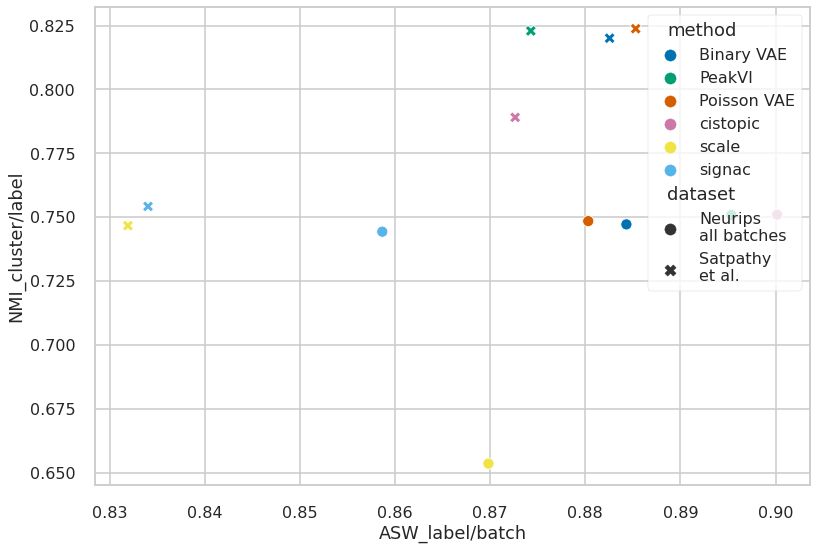

In [41]:
sns.scatterplot(data=scib_table, x='ASW_label/batch', y='NMI_cluster/label', hue='method', style='dataset')